In [221]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

import cv2
from imutils.contours import sort_contours
import imutils
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
directory = r''

In [5]:
Name=[]
for file in os.listdir(directory):
    if file!='.directory':
        Name+=[file]
print(Name)
print(len(Name))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'dec', 'div', 'eq', 'mul', 'sub', 'x', 'y', 'z']
19


In [222]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name))

reverse_mapping[10] = "+"
reverse_mapping[11] = "."
reverse_mapping[12] = "/"
reverse_mapping[13] = "="
reverse_mapping[14] = "*"
reverse_mapping[15] = "-"
for key, value in reverse_mapping.items():
    print(key, ' : ', value)
def mapper(value):
    return reverse_mapping[value]


0  :  0
1  :  1
2  :  2
3  :  3
4  :  4
5  :  5
6  :  6
7  :  7
8  :  8
9  :  9
10  :  +
11  :  .
12  :  /
13  :  =
14  :  *
15  :  -
16  :  x
17  :  y
18  :  z


In [7]:
dataset=[]
testset=[]
count=0
for name in Name:
    path=os.path.join(directory,name)
    t=0
    for im in os.listdir(path):
        if im[-4:]=='.jpg' or im[-4:]=='.png':
            # print(im)
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(40,40))
            image=img_to_array(image)
            image=image/255.0
            if t<400:
                dataset.append([image,count])
            else:   
                testset.append([image,count])
            t+=1
    count=count+1


In [8]:
print(len(testset[0][0]))

40


In [9]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)
print(len(labels0))

7411


In [10]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)
print(data.shape)
print(labels.shape)

(7411, 40, 40, 3)
(7411, 19)


In [11]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)
print(test.shape)
print(tlabels.shape)

(2660, 40, 40, 3)
(2660, 17)


In [12]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=1)
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(5928, 40, 40, 3)
(1483, 40, 40, 3)
(5928, 19)
(1483, 19)


In [13]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [208]:
pretrained_model = tf.keras.applications.DenseNet201(input_shape=(40,40,3),include_top=False,weights='imagenet',pooling='max')
pretrained_model.trainable = False

In [209]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(19, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(x)

Tensor("dense_2/Relu:0", shape=(None, 128), dtype=float32)


In [210]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [211]:
fitted_model=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=15)

Epoch 1/15
186/186 [==============================] - 41s 223ms/step - loss: 1.6802 - accuracy: 0.5010 - val_loss: 0.9550 - val_accuracy: 0.7181
Epoch 2/15
186/186 [==============================] - 37s 197ms/step - loss: 1.0737 - accuracy: 0.6584 - val_loss: 0.8056 - val_accuracy: 0.7424
Epoch 3/15
186/186 [==============================] - 37s 198ms/step - loss: 0.9443 - accuracy: 0.6972 - val_loss: 0.6434 - val_accuracy: 0.7903
Epoch 4/15
186/186 [==============================] - 34s 183ms/step - loss: 0.8641 - accuracy: 0.7186 - val_loss: 0.6290 - val_accuracy: 0.7889
Epoch 5/15
186/186 [==============================] - 33s 180ms/step - loss: 0.8248 - accuracy: 0.7267 - val_loss: 0.5744 - val_accuracy: 0.8024
Epoch 6/15
186/186 [==============================] - 34s 180ms/step - loss: 0.7804 - accuracy: 0.7476 - val_loss: 0.5282 - val_accuracy: 0.8287
Epoch 7/15
186/186 [==============================] - 34s 180ms/step - loss: 0.7585 - accuracy: 0.7508 - val_loss: 0.5454 - val_ac

In [225]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        81
           1       0.91      0.93      0.92        69
           2       0.67      0.73      0.70        73
           3       0.86      0.53      0.66        81
           4       0.89      0.71      0.79        69
           5       0.68      0.75      0.71        81
           6       0.78      0.64      0.71        84
           7       0.75      0.83      0.78        86
           8       0.80      0.92      0.85        72
           9       0.79      0.61      0.69        89
          10       0.96      0.93      0.94        83
          11       1.00      0.98      0.99        84
          12       1.00      0.93      0.96        82
          13       0.96      0.89      0.93        76
          14       0.92      0.96      0.94        84
          15       0.88      1.00      0.93        91
          16       0.87      0.93      0.90        82
          17       0.65    

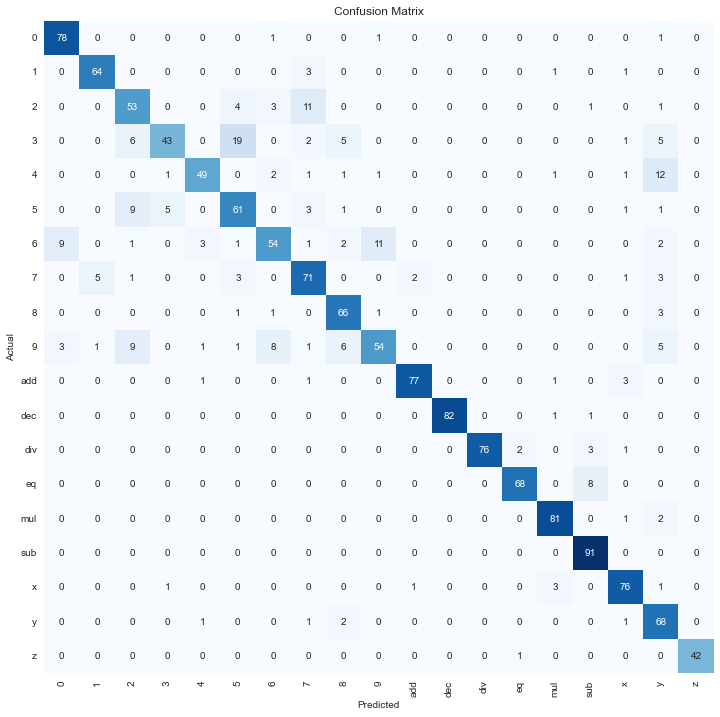

In [231]:
cm  = confusion_matrix(ground, pred)
length = 19
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
plt.xticks(np.arange(length)+.5, normal_mapping, rotation= 90)
plt.yticks(np.arange(length)+.5, normal_mapping, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

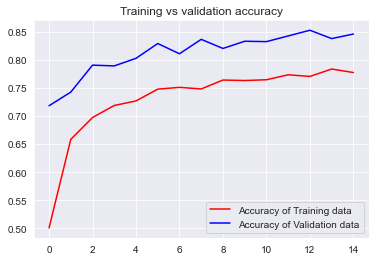

<Figure size 432x288 with 0 Axes>

In [232]:
get_acc = fitted_model.history['accuracy']
value_acc = fitted_model.history['val_accuracy']
get_loss = fitted_model.history['loss']
validation_loss = fitted_model.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

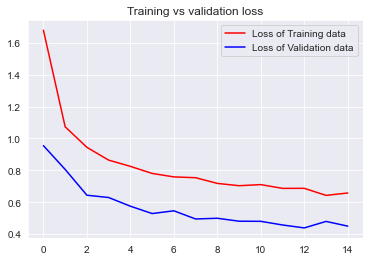

<Figure size 432x288 with 0 Axes>

In [233]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [216]:
image=load_img(r'C:\Users\Muhammad Haris\dataset\add\34.jpg',target_size=(40,40))
print(type(image))

<class 'PIL.Image.Image'>


In [219]:

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
print(prediction_image.shape)
prediction_image= np.expand_dims(image, axis=0)
prediction_image.shape

(40, 40, 3)


(1, 40, 40, 3)

In [220]:
pred=model.predict(prediction_image)
value=np.argmax(pred)
move_name=mapper(value)
print("Prediction is {}".format(move_name))

Prediction is 4


In [168]:
def prediction(img):
    img = cv2.resize(img,(40, 40))
    
    img = cv2.GaussianBlur(img, (5,5), 0)
    plt.imshow(img)
    norm_image = cv2.normalize(img, None, alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    norm_image=img/255
    print(norm_image.shape)
    norm_image = norm_image.reshape((norm_image.shape[0], norm_image.shape[1], 3))
    case = np.asarray([norm_image])
    print(case.shape)
    pred = model.predict(case)
    value=np.argmax(pred)
    move_name=mapper(value)
    print("Prediction is {}".format(move_name))
    return format(move_name)

In [163]:
def element_extractor_from_image(path,x_inc,y_inc,w_inc,h_inc,thres_val):
    image = cv2.imread(path,0)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    blurred = cv2.GaussianBlur(rgb, (5,5), 0)
    # perform edge detection, find contours in the edge map, and sort the
    # resulting contours from left-to-right
    edged = cv2.Canny(blurred, 30, 150)
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    chars=[]
    for c in cnts:

        (x, y, w, h) = cv2.boundingRect(c)
        x = x - x_inc
        y= y- y_inc
        w = w+ w_inc
        h= h+ h_inc
        if w*h>thres_val:

            roi = rgb[y:y + h, x:x + w]
            chars.append(prediction(roi))
            cv2.rectangle(image, (x, y), ((x + w), (y + h)), (0, 255, 0), 2)
    plt.imshow(image)


(40, 40, 3)
(1, 40, 40, 3)
Prediction is 7
(40, 40, 3)
(1, 40, 40, 3)
Prediction is +
(40, 40, 3)
(1, 40, 40, 3)
Prediction is 3


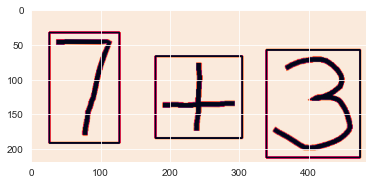

In [236]:
element_extractor_from_image(r"F:\itu\sem5\AI\peeraject\test1.jpg",10,10,20,20,1200)

(40, 40, 3)
(1, 40, 40, 3)
Prediction is /
(40, 40, 3)
(1, 40, 40, 3)
Prediction is 2
(40, 40, 3)
(1, 40, 40, 3)
Prediction is +
(40, 40, 3)
(1, 40, 40, 3)
Prediction is 5


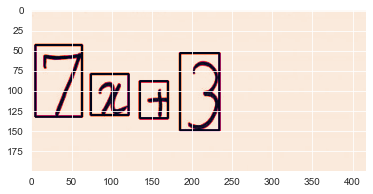

In [234]:
element_extractor_from_image(r"F:\itu\sem5\AI\peeraject\test5.jpg",10,10,10,10,1000)

(40, 40, 3)
(1, 40, 40, 3)
Prediction is 9
(40, 40, 3)
(1, 40, 40, 3)
Prediction is *
(40, 40, 3)
(1, 40, 40, 3)
Prediction is 1
(40, 40, 3)
(1, 40, 40, 3)
Prediction is 3


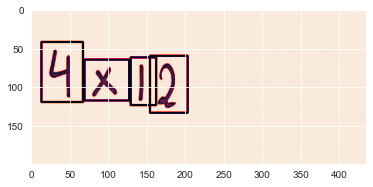

In [235]:
element_extractor_from_image(r"F:\itu\sem5\AI\peeraject\test7.jpg",10,10,25,15,1300)

(40, 40, 3)
(1, 40, 40, 3)
Prediction is 3


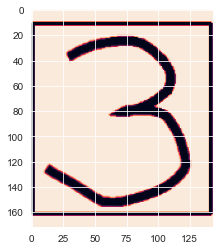

In [237]:
element_extractor_from_image(r"F:\itu\sem5\AI\peeraject\test19.jpg",10,10,25,15,1000)